In [1]:
import numpy as np
import pandas as pd
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline

## read and describe the metadata

In [2]:
fpn_csv = 'cluster_images.csv'

# edit this for html preview
image_path = 'img_small/'

In [3]:
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,painting,"painting, oil on canvas",106 x 94 cm,...,3,0,0,4,3,False,0,0,5,"distorted perspective, shadow, signification o..."
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,False,sculpture,"sculpture, fabric, glass & metal",24 x 420 x 335 cm,...,1,3,0,3,2,False,0,0,5,"hard to understand the viewpoint, sense of for..."
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,False,painting,"painting, oil on canvas",156 x 184 cm,...,2,4,4,2,4,False,0,0,5,"flatish, textured shapes & specific colors-lin..."
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,1,2,0,2,4,False,0,0,5,"shapes, layers, paint handlng/texture, orienta..."
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,painting,"painting, mixed media on canvas",73 x 60 cm,...,1,4,1,0,4,False,0,0,5,"ambiguity through abstraction, odd shape, v te..."


## create a subset of the columns you will use to fit KMeans

In [5]:
# X_raw = data[['primary_medium', 'art_movement', 'kinetic', 'spatial_dimension', 'spatial_dimension2']]
# X_raw = data[['si', 'va', 'te', 'co', 'or', 'sh']]
X_raw = data[['primary_medium', 'co', 'va', 'spatial_dimension']]
X_raw.head()

,primary_medium,co,va,spatial_dimension
0,painting,0,3,False
1,sculpture,0,1,True
2,painting,4,2,False
3,painting,0,1,False
4,painting,1,1,False


### Transform features

In [6]:
from sklearn.feature_extraction import DictVectorizer

# turn DataFrame into dictionary
X_filled = X_raw.fillna('NA')
X_dict = X_filled.to_dict( orient = 'records' )

# load vectorizer pkl file and vectorize dict
vectorizer = joblib.load('vectorizer.pkl')
X_dict = vectorizer.fit_transform(X_dict)

X = X_dict

print(X.shape, '\n')
print(X)

(404, 10) 

[[0. 0. 0. ... 0. 0. 3.]
 [0. 0. 0. ... 0. 1. 1.]
 [4. 0. 0. ... 0. 0. 2.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 2.]
 [1. 0. 0. ... 0. 0. 1.]]


# KMeans

In [7]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

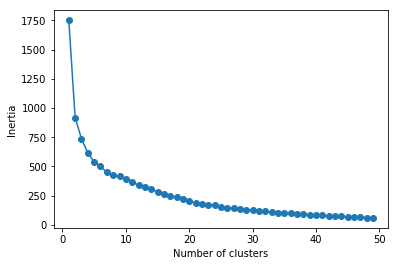

In [8]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

n = 50

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, n):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, n), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [20]:
range_n_clusters = [6, 7, 8, 9, 10, 11]

For n_clusters = 6 The average silhouette_score is : 0.2989188168535188


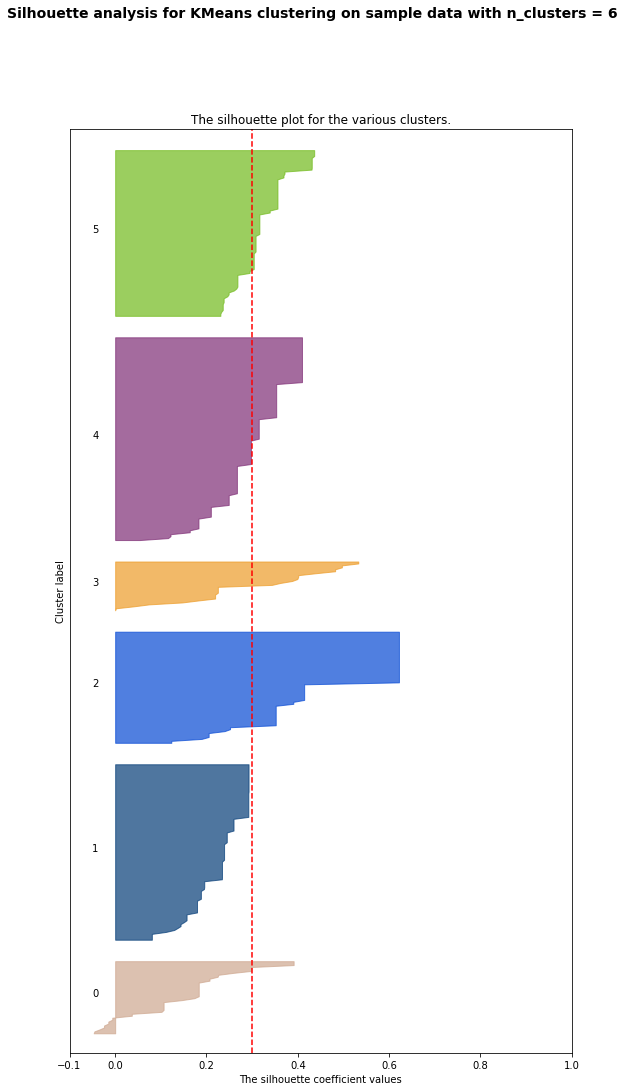

For n_clusters = 7 The average silhouette_score is : 0.2639622329619624


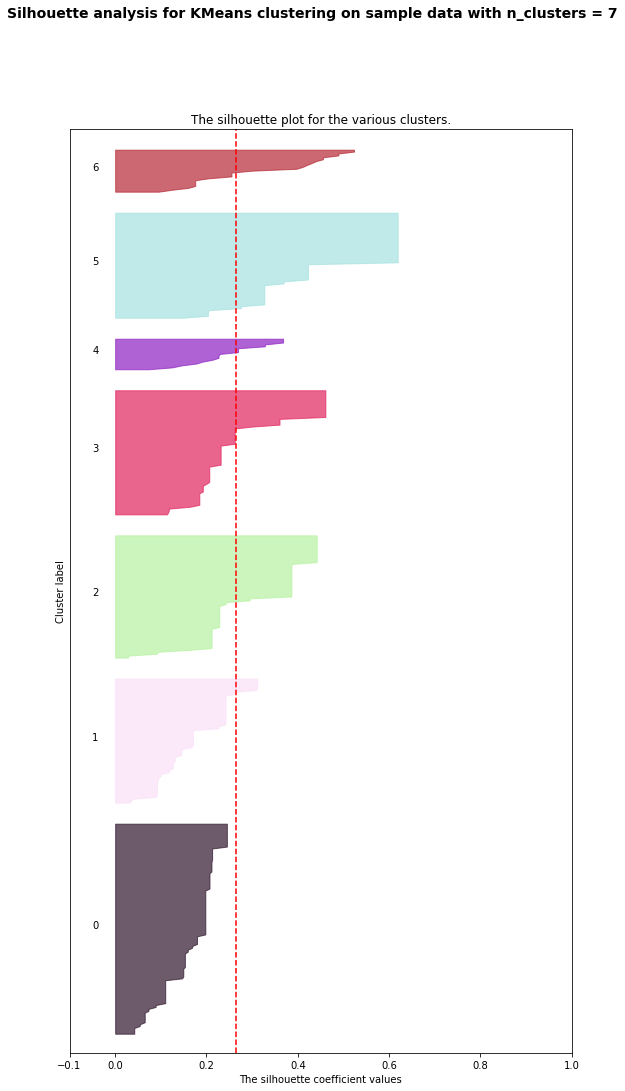

For n_clusters = 8 The average silhouette_score is : 0.3046842246361429


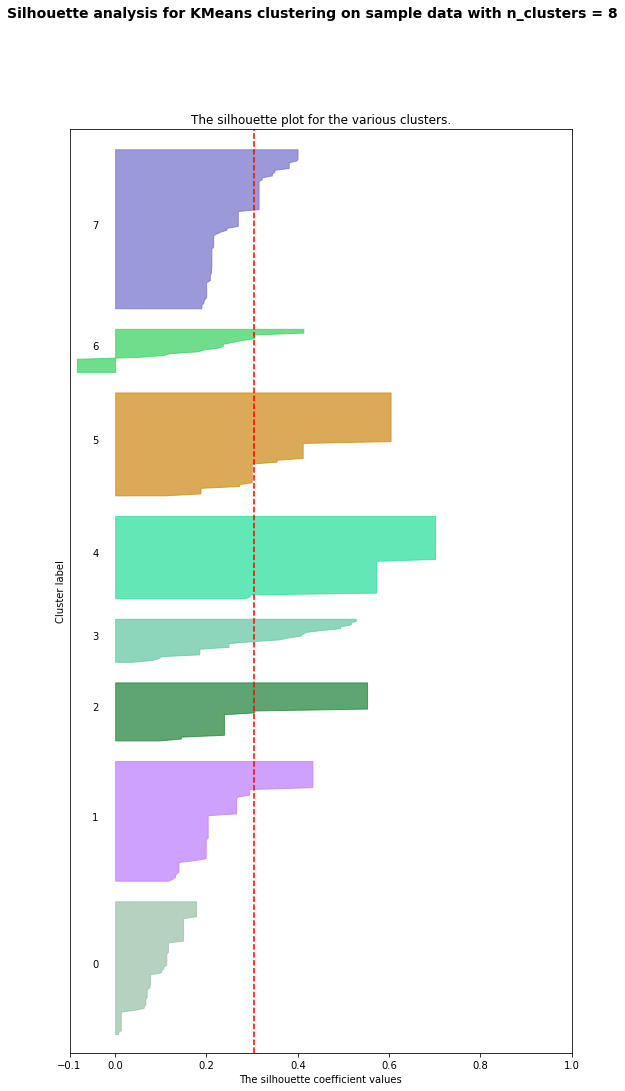

For n_clusters = 9 The average silhouette_score is : 0.2903022563662522


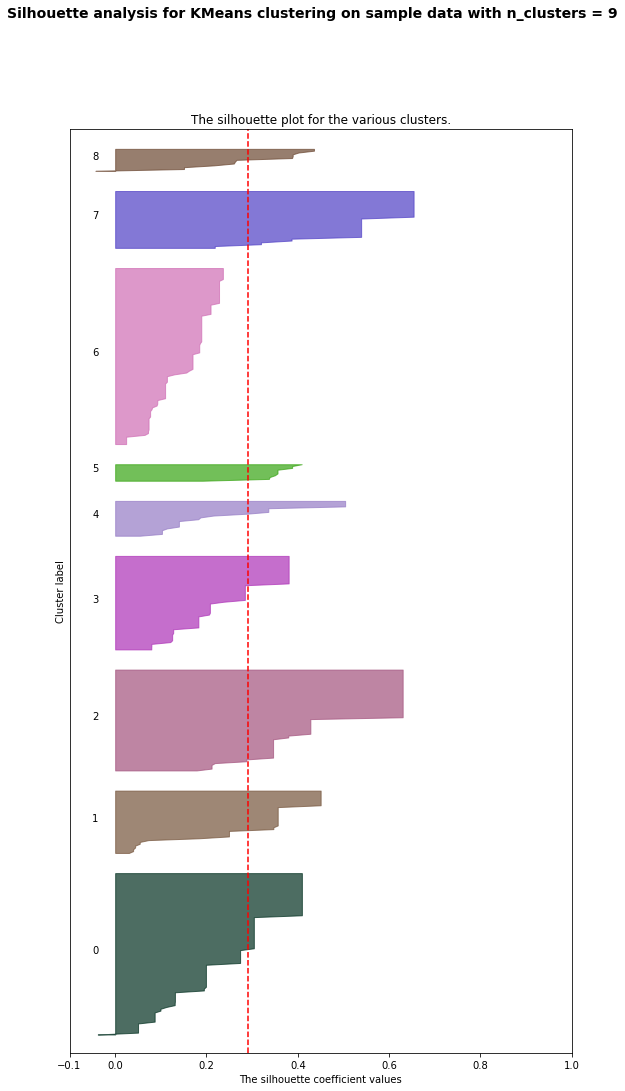

For n_clusters = 10 The average silhouette_score is : 0.3080846132222617


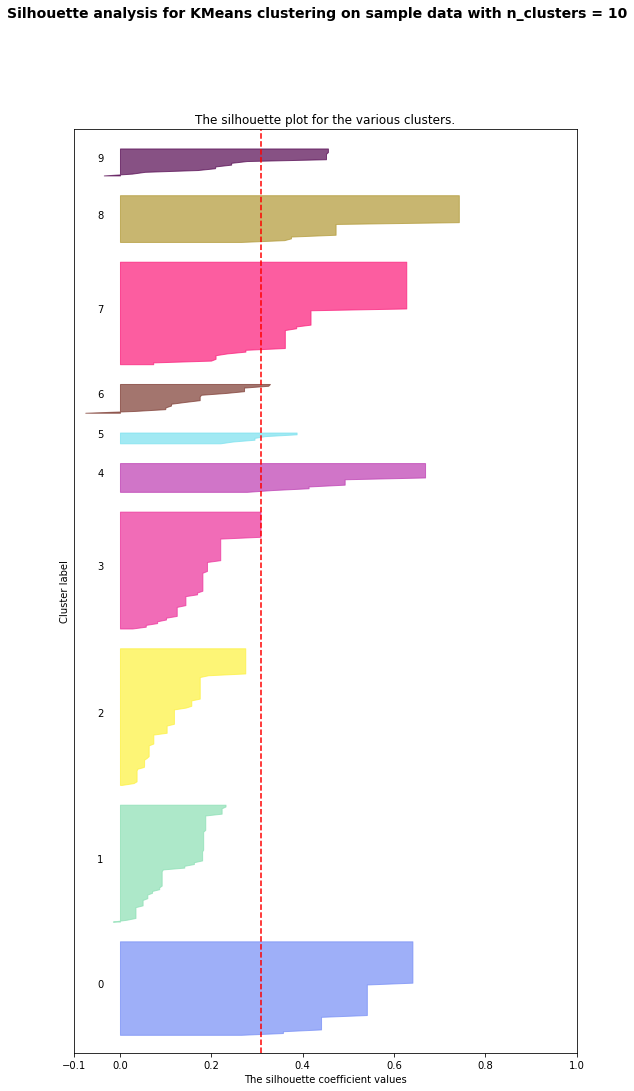

For n_clusters = 11 The average silhouette_score is : 0.3210182372512147


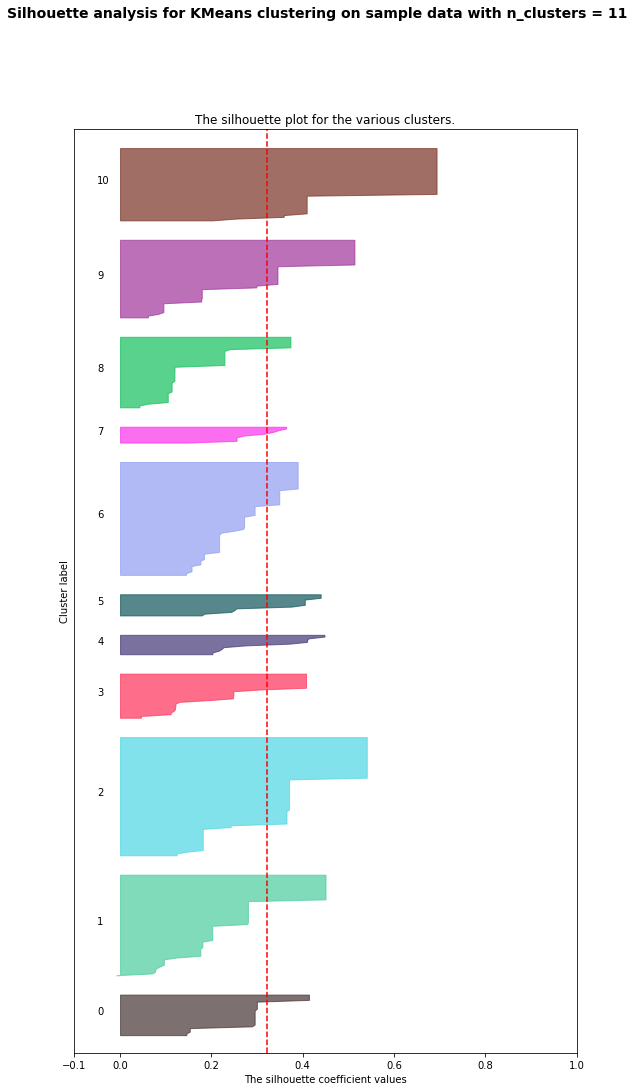

In [21]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## final fit

The previous plots show: 
n_clusters = 8 and 9 are the most promising values. After inspecting preview.html I settles on 9 clusters

In [17]:
# set the number of clusters in the final model
my_n_clusters = 9

In [18]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## look at results

After running the cell below, open preview.html to see the clusters!

In [19]:
max_img = 12

f = open("preview.html","w")

for i in range(0, max(km.labels_)+1):
    f.write("<h2 style='margin-top:100px;border-top:10px solid black'>Cluster "+ str(i+1) +"</h2>")
    cat = 0
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            cat+=1
            if(cat>=max_img):
                break
            img_filename = str(j+2) + '_small.jpg'
            f.write("<img src='img_small/" + img_filename + "' style='max-width:200px; max-height:200px;'>\n")
            
f.close()